---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [41]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None, type=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    import matplotlib.pyplot as plt
    
    plt.figure()
    if type is None:
        pos = nx.spring_layout(G)
    elif type == 'bipartite':

        # Separate by group
        l, r = nx.bipartite.sets(G)
        pos = {}

        # Update position for node from each group
        pos.update((node, (1, index*2)) for index, node in enumerate(l))
        pos.update((node, (2, index*2)) for index, node in enumerate(r))
        
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [42]:

import os

os.getcwd()

'C:\\Users\\577342\\Documents\\Repositories\\notebooks\\data-science-5k\\ipynb\\applied-social-network-analysis'

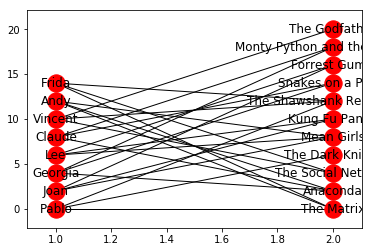

In [43]:

%matplotlib inline

B = nx.read_adjlist('../../data/txt/Employee_Movie_Choices.txt', create_using=nx.Graph(),
                    delimiter='\t')

plot_graph(B, weight_name=None, type='bipartite')

In [44]:
def answer_one():
    
    # load in the bipartite graph from Employee_Movie_Choices.txt
    B = nx.read_adjlist('../../data/txt/Employee_Movie_Choices.txt', create_using=nx.Graph(),
                        delimiter='\t')
    
    return B # Your Answer Here

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

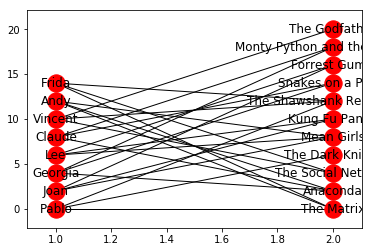

In [45]:

# load in the bipartite graph from Employee_Movie_Choices.txt
B = nx.read_adjlist('../../data/txt/Employee_Movie_Choices.txt', create_using=nx.Graph(),
                    delimiter='\t')

# Separate by group
employees, movies = nx.bipartite.sets(B)

# Create attribute dictionary
employee_dict = {employee: 'employee' for employee in employees}
movie_dict = {movie: 'movie' for movie in movies}
attribute_dict = {**employee_dict, **movie_dict}

nx.set_node_attributes(B, name='type', values=attribute_dict)
plot_graph(B, weight_name=None, type='bipartite')

In [46]:

B.nodes(data=True)

NodeDataView({'Andy': {'type': 'employee'}, 'Anaconda': {'type': 'movie'}, 'Mean Girls': {'type': 'movie'}, 'The Matrix': {'type': 'movie'}, 'Claude': {'type': 'employee'}, 'Monty Python and the Holy Grail': {'type': 'movie'}, 'Snakes on a Plane': {'type': 'movie'}, 'Frida': {'type': 'employee'}, 'The Shawshank Redemption': {'type': 'movie'}, 'The Social Network': {'type': 'movie'}, 'Georgia': {'type': 'employee'}, 'Joan': {'type': 'employee'}, 'Forrest Gump': {'type': 'movie'}, 'Kung Fu Panda': {'type': 'movie'}, 'Lee': {'type': 'employee'}, 'Pablo': {'type': 'employee'}, 'The Dark Knight': {'type': 'movie'}, 'Vincent': {'type': 'employee'}, 'The Godfather': {'type': 'movie'}})

In [47]:
def answer_two():
    
    # Your Code Here
    B = answer_one()

    # Separate by group
    employees, movies = nx.bipartite.sets(B)

    # Create attribute dictionary
    employee_dict = {employee: 'employee' for employee in employees}
    movie_dict = {movie: 'movie' for movie in movies}
    attribute_dict = {**employee_dict, **movie_dict}

    nx.set_node_attributes(B, name='type', values=attribute_dict)
    
    return B # Your Answer Here

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

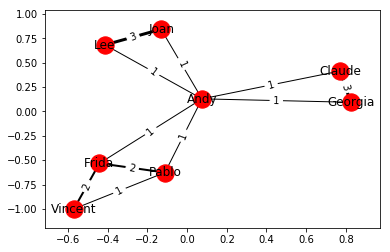

In [48]:

# Your Code Here
B = answer_two()

# Separate by group
employees, movies = nx.bipartite.sets(B)
W = bipartite.weighted_projected_graph(B, employees)
plot_graph(W, weight_name='weight', type=None)

In [49]:

W.edges(data=True)

EdgeDataView([('Pablo', 'Frida', {'weight': 2}), ('Pablo', 'Andy', {'weight': 1}), ('Pablo', 'Vincent', {'weight': 1}), ('Joan', 'Lee', {'weight': 3}), ('Joan', 'Andy', {'weight': 1}), ('Georgia', 'Claude', {'weight': 3}), ('Georgia', 'Andy', {'weight': 1}), ('Lee', 'Andy', {'weight': 1}), ('Claude', 'Andy', {'weight': 1}), ('Vincent', 'Frida', {'weight': 2}), ('Andy', 'Frida', {'weight': 1})])

In [50]:
def answer_three():
        
    # Your Code Here
    B = answer_two()

    # Separate by group
    employees, movies = nx.bipartite.sets(B)
    W = bipartite.weighted_projected_graph(B, employees)
    
    return W # Your Answer Here

In [51]:

answer_three()

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

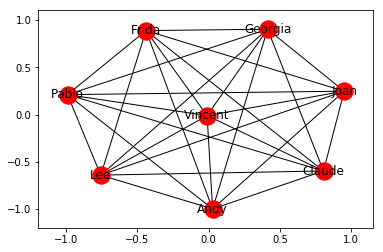

In [26]:

G = nx.read_edgelist('../../data/txt/Employee_Relationships.txt', create_using=nx.Graph(),
                     delimiter='\t', nodetype=str, data=(('score', str), ))

plot_graph(G, weight_name=None, type=None)

In [36]:

rows_list = []
edge_name_set = set()

score_row_dict = {}
for edge_tuple in list(G.edges(data=True)):
    edge_name = edge_tuple[0] + '_' + edge_tuple[1]
    edge_name_set.add(edge_name)
    edge_value = int(edge_tuple[2]['score'])
    score_row_dict[edge_name] = edge_value
    
weight_row_dict = {}
for edge_tuple in list(W.edges(data=True)):
    edge_name = edge_tuple[0] + '_' + edge_tuple[1]
    edge_name_set.add(edge_name)
    edge_value = int(edge_tuple[2]['weight'])
    weight_row_dict[edge_name] = edge_value

for edge_name in edge_name_set:
    row_dict = {}
    row_dict['relationship'] = edge_name
    if edge_name in score_row_dict:
        row_dict['score'] = score_row_dict[edge_name]
    else:
        row_dict['score'] = 0
    if edge_name in weight_row_dict:
        row_dict['movies'] = weight_row_dict[edge_name]
    else:
        row_dict['movies'] = 0
    rows_list.append(row_dict)
    
movie_relationships_df = pd.DataFrame(rows_list, columns=['relationship', 'score', 'movies'])

In [37]:

movie_relationships_df.head(n=15)

,relationship,score,movies
0,Vincent_Frida,0,2
1,Claude_Vincent,0,0
2,Pablo_Andy,0,1
3,Andy_Georgia,-10,0
4,Frida_Pablo,50,0
5,Joan_Andy,0,1
6,Lee_Pablo,0,0
7,Georgia_Claude,0,3
8,Claude_Joan,0,0
9,Frida_Joan,0,0


In [29]:

employee_relationships_df = nx.to_pandas_dataframe(G, weight='score', nonedge=0)
employee_movie_choices_df = nx.to_pandas_dataframe(W, weight='weight', nonedge=0)

In [31]:

employee_relationships_df.corrwith(employee_movie_choices_df, axis=0, drop=False)

Andy      -0.192450
Claude     0.933008
Frida      0.988784
Georgia    0.890439
Joan       0.987457
Lee        0.870837
Pablo      0.503128
Vincent    0.600884
dtype: float64

In [33]:

np.diag_indices_from(employee_relationships_df)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([0, 1, 2, 3, 4, 5, 6, 7]))

In [38]:

movie_relationships_df['score'].corr(movie_relationships_df['movies'])

0.085592656578431611

In [52]:
def answer_four():
        
    # Your Code Here
    G = nx.read_edgelist('../../data/txt/Employee_Relationships.txt', create_using=nx.Graph(),
                         delimiter='\t', nodetype=str, data=(('score', str), ))
    W = answer_three()
    rows_list = []
    edge_name_set = set()

    score_row_dict = {}
    for edge_tuple in list(G.edges(data=True)):
        edge_name = edge_tuple[0] + '_' + edge_tuple[1]
        edge_name_set.add(edge_name)
        edge_value = int(edge_tuple[2]['score'])
        score_row_dict[edge_name] = edge_value

    weight_row_dict = {}
    for edge_tuple in list(W.edges(data=True)):
        edge_name = edge_tuple[0] + '_' + edge_tuple[1]
        edge_name_set.add(edge_name)
        edge_value = int(edge_tuple[2]['weight'])
        weight_row_dict[edge_name] = edge_value

    for edge_name in edge_name_set:
        row_dict = {}
        row_dict['relationship'] = edge_name
        if edge_name in score_row_dict:
            row_dict['score'] = score_row_dict[edge_name]
        else:
            row_dict['score'] = 0
        if edge_name in weight_row_dict:
            row_dict['movies'] = weight_row_dict[edge_name]
        else:
            row_dict['movies'] = 0
        rows_list.append(row_dict)

    movie_relationships_df = pd.DataFrame(rows_list, columns=['relationship', 'score', 'movies'])
    corr = movie_relationships_df['score'].corr(movie_relationships_df['movies'])
    
    return corr # Your Answer Here

In [53]:

answer_four()

0.085592656578431611